In [28]:
!pip install tensorflow

In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape


(10000, 14)

In [4]:

df.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [5]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:

df.dtypes


CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
 df['Gender'].unique()
 

array(['Female', 'Male'], dtype=object)

In [9]:
df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)


In [10]:
#one hot encoding
df = pd.get_dummies(data = df, columns=['Geography'])
df.dtypes


CustomerId             int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()
    plt.show()

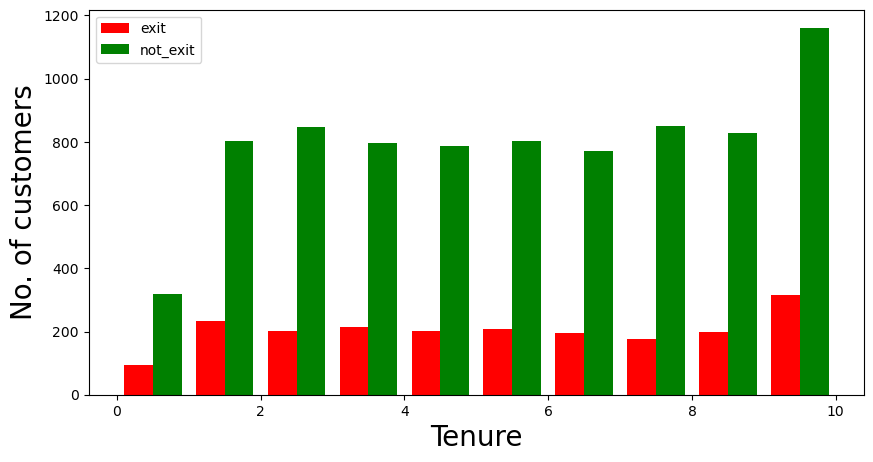

In [13]:
#get in to temp fframe
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']
visualization(df_exited, df_not_exited, "Tenure")


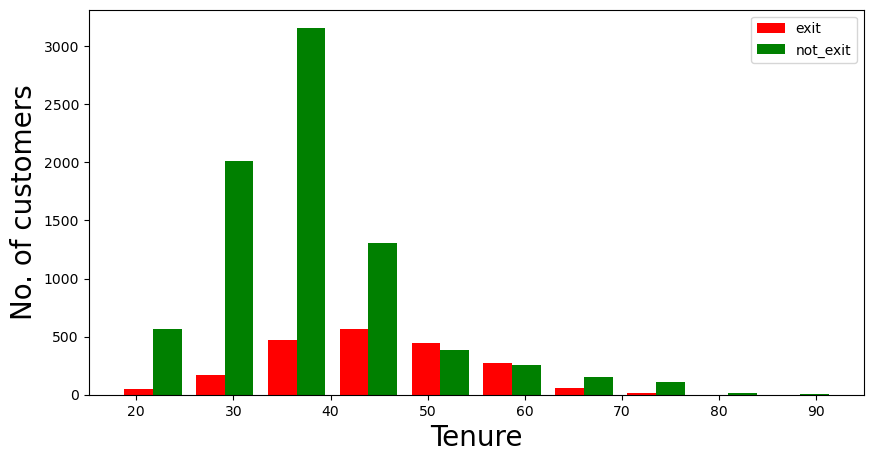

In [14]:
df_exited1 = df[df['Exited']==1]['Age']
df_not_exited1= df[df['Exited']==0]['Age']
visualization(df_exited1, df_not_exited1, "Tenure")

In [22]:
# Normalization
cols_to_scale = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [23]:
# Separate the outcome or target column
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [25]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Import TensorFlow and Keras for building the neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [30]:
# Build a basic neural network model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5920 - loss: 0.7055 - val_accuracy: 0.8075 - val_loss: 0.4407
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8126 - loss: 0.4362 - val_accuracy: 0.8213 - val_loss: 0.4054
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8341 - loss: 0.4011 - val_accuracy: 0.8394 - val_loss: 0.3791
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8470 - loss: 0.3769 - val_accuracy: 0.8381 - val_loss: 0.3673
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8520 - loss: 0.3618 - val_accuracy: 0.8431 - val_loss: 0.3594
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8610 - loss: 0.3431 - val_accuracy: 0.8462 - val_loss: 0.3559
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8604 - loss: 0.3376 - val_accuracy: 0.8450 - val_loss: 0.3581
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.3356 - val_accuracy: 0.

In [33]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3361
Test Accuracy: 85.55%
